PHYS 381: Computational Physics

Assignment 3: Projectile motion under air resistance

Jared Crebo 30085839

Kernel: Python 3.10.11 | IDE: Visual Studio Code

2 Vertical motion under the action of air resistance

When refreshing the code blocks, be sure to "Run All" instead of running the individual code blocks since some of the iterative variables need to be reset after running once. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sphere Parameters
B_sphere = 1.6e-4 # Ns/m^2
C_sphere = 0.25 # Ns^2 / m^4
D_sphere = 1e-4 # diameter (m)
g = 9.81 # m/s^2
density = 2e3 # kg/m^3

# Mass = rho * volume
mass = density * 4/3*np.pi*(D_sphere/2)**3 # kg
# Weight = mass * gravity
weight = mass * g # Newtons
# Terminal Velocity is v when f(v) = weight
terminal_velocity = max(- np.roots([C_sphere,B_sphere,-weight]))
# Dvt = Diameter * terminal velocity
Dvt = D_sphere * terminal_velocity
print("Dvt = " + str(Dvt) + " m^2/s")

Dvt = 6.988034211948918e-08 m^2/s


$Dv_t$ < 2e-5, 

therefore, $c \approx 0$ and $f(v) \approx bv$

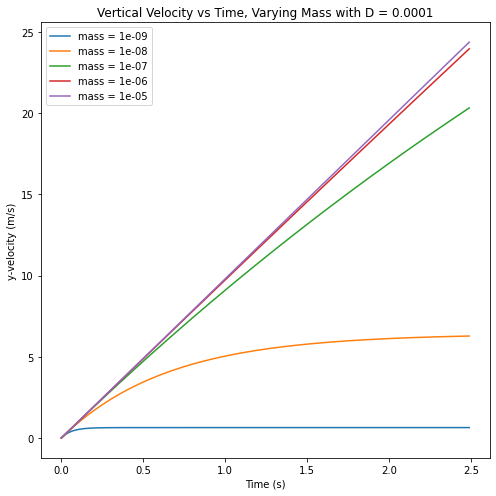

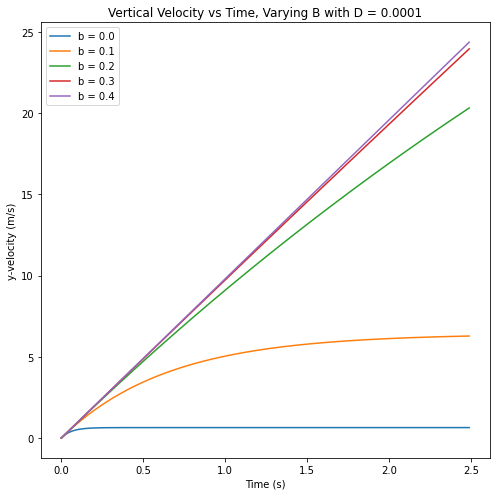

In [11]:
# Define how many timesteps to simulate
timesteps = 250
# Define timestep size in seconds
dt = 0.01

def vertical_velocity(mass, B, D):
    '''
    Input Parameters
    mass - mass of object (kg)
    B - linear air resistance coefficient (Ns/m^2)
    D - diameter of object

    Function uses Explicit Euler method to calculate the change in vertical velocity wrt time
    Function assumes linear air resistance
    Function returns two NumPy arrays of time and velocity
    '''
    # Initialize t and vy arrays and set their initial conditions
    b = B * D
    t = np.zeros(timesteps)
    vy = np.zeros(timesteps)
    t[0] = 0
    vy[0] = 0

    # For each timestep i, calculate dvy and add it to the previous vy
    for i in range(1,timesteps):
        # Linear form of air resistance dvy/dt
        dvy = g*dt - b/mass * vy[i-1] * dt
        # Add terms to vy and update t
        vy[i] = vy[i-1] + dvy
        t[i] = t[i-1] + dt
    return t, vy

# Varying Mass
t = np.zeros((5,timesteps)) # Initialize time array to hold 5 simulations
vy = np.zeros((5,timesteps)) # Initialize vy array to hold 5 simulations
fig, ax = plt.subplots(figsize=[7,7]) # Initialize figure for plotting
for i in range(5): # For each simulation varying mass, increase mass by factor of 10 and plot it on the same figure
    t[i,:], vy[i,:] = vertical_velocity(mass * 10**i, B_sphere, D_sphere)
    ax.plot(t[i,:],vy[i,:],label="mass = " + str('{:0.0e}'.format(mass*10**i)))   
ax.set_xlabel("Time (s)")
ax.set_ylabel("y-velocity (m/s)")
ax.set_title("Vertical Velocity vs Time, Varying Mass with D = " + str(D_sphere))
fig.tight_layout()
ax.legend()

# Varying b Coefficient b = BD
fig, ax = plt.subplots(figsize=[7,7]) # Initialize figure for plotting
for i in range(5): # For each simulation varying b, decrease b by factor of 10 and plot it on the same figure
    t[i,:], vy[i,:] = vertical_velocity(mass, B_sphere * 10**-i, D_sphere)
    ax.plot(t[i,:], vy[i,:],label="b = " + str(round(i * 0.1,2)))
ax.set_xlabel("Time (s)")
ax.set_ylabel("y-velocity (m/s)")
ax.set_title("Vertical Velocity vs Time, Varying B with D = " + str(D_sphere))
fig.tight_layout()
ax.legend()


The figures above show that an increase in m is equivalent to a decrease in coefficient b. They show each mass increasing by a factor of 10 is equivalent to each b decreasing by a factor of 10. 



Analytical Expression: $v_y = \frac{mg}{b}(1-e^{-bt/m})$

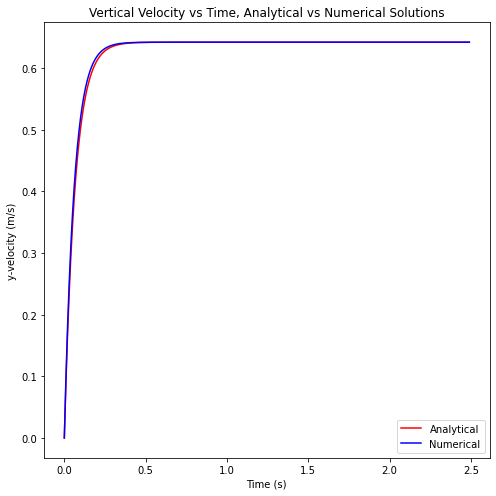

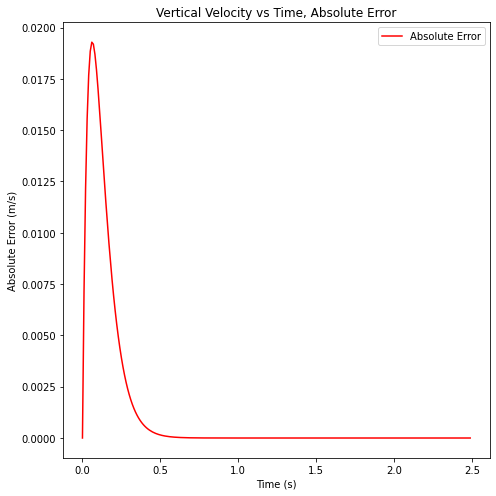

In [12]:
# Analytical vs Numerical
t_analytical = t[0,:]
vy_analytical = mass * g / (B_sphere * D_sphere) * (1 - np.exp(-B_sphere*D_sphere*t_analytical/mass))
fig, ax = plt.subplots(figsize = [7,7])
ax.plot(t_analytical,vy_analytical,color="red",label="Analytical")
ax.plot(t[0,:], vy[0,:], color="blue", label="Numerical")
ax.set_xlabel("Time (s)")
ax.set_ylabel("y-velocity (m/s)")
ax.set_title("Vertical Velocity vs Time, Analytical vs Numerical Solutions")
fig.tight_layout()
ax.legend()

# Absolute Error
error = vy[0,:] - vy_analytical
fig, ax = plt.subplots(figsize = [7,7])
ax.plot(t_analytical, error, color = "red", label = "Absolute Error")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Absolute Error (m/s)")
ax.set_title("Vertical Velocity vs Time, Absolute Error")
fig.tight_layout()
ax.legend()


Since the numerical function assumes a linear relationship, it is more accurate at lower velocities where the $bv$ term dominates in $f(v) = cv^2 + bv$. This error quickly increases in the transition region between linear and quadratic dominance as the velocity increases and the $cv^2$ term begins to dominate. Eventually, the term $cv^2$ becomes so dominant in $f(v)$ that $bv$ becomes negligible and the error is reduced. 

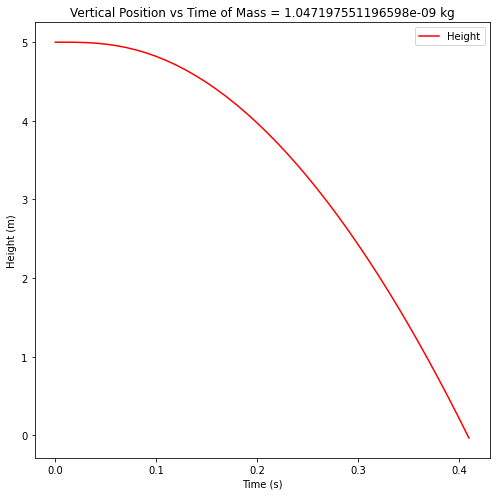

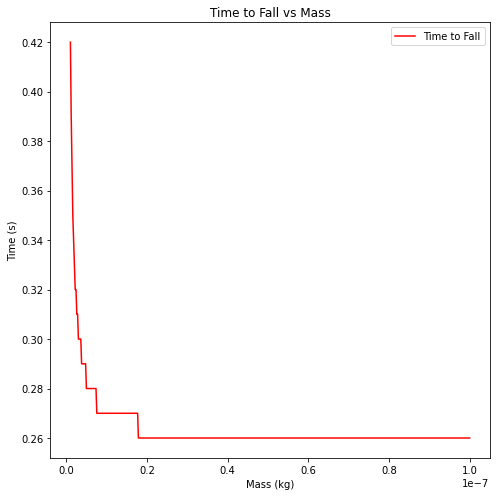

In [13]:

def vertical_position(mass, B, D, H):
    '''
    Input Parameters
    mass - mass of object (kg)
    B - linear air resistance coefficient (Ns/m^2)
    D - diameter of object (m)
    H - initial height (m)

    Function uses Explicit Euler method to calculate the change in vertical position wrt time
    Function assumes linear air resistance
    Function returns two Python lists of time and y position
    '''

    # Define initial conditions for y position, time, and initial y velocity
    y = [H]
    t = [0]
    vy = [0]

    # Calculate b coefficient
    b = B*D
    
    i = 0
    while y[i] >= 0: # Iterate until object hits the ground (y = 0)
        i += 1
        dvy = g*dt - b/mass * vy[i-1] * dt # Calculate change in vertical velocity using Explicit Euler method on linear air resistance equation
        vy.append(vy[i-1] + dvy) # Add change in velocity to the velocity list
        t.append(t[i-1] + dt) # Update t + dt
        y.append(y[i-1] - vy[i-1] * t[i-1]) # Update new y position based on new velocity
    return t, y

# Plot vertical position vs time of a mass falling from 5m initial height
fig, ax = plt.subplots(figsize=[7,7])
t1, y1 = vertical_position(mass, B_sphere, D_sphere, 5)
ax.plot(t1, y1, color = "red", label = "Height")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Height (m)")
ax.set_title("Vertical Position vs Time of Mass = " + str(mass) + " kg")
fig.tight_layout()
ax.legend()


num = 500 # Number of different masses to test
t = np.empty(num) # Initialize new time array
m = np.linspace(1e-9, 1e-7, num) # Initialize new mass array

for i in range(num): # For each mass
    t1, y1 = vertical_position(m[i], B_sphere, D_sphere, 5) # Calculate vertical position wrt time for range of masses
    t[i] = t1[-1] # Store the final time in the array when y = 0

fig, ax = plt.subplots(figsize=[7,7])
ax.plot(m, t, color = "red", label = "Time to Fall") # Plot time to fall vs mass of object
ax.set_xlabel("Mass (kg)")
ax.set_ylabel("Time (s)")
ax.set_title("Time to Fall vs Mass")
fig.tight_layout()
ax.legend()


The often quoted statement that all objects fall together with the same acceleration regardless of their masses is only valid for spherical objects with masses approximately greater than 2e-8. 

The figure above shows that past this point, the time for an object to fall remains the same. 